<a href="https://colab.research.google.com/github/cysorianoc/ShareWind/blob/main/Multidirectional_Loads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidirectional load multipliers for shared anchors

## [ShareWind](https://cordis.europa.eu/project/id/101106921): Shared anchors for floating wind turbines

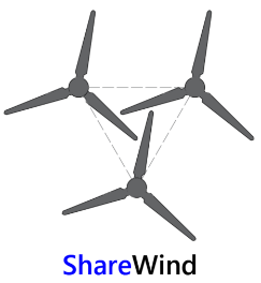



### Source:

The presented load multipliers were baed on:

Balakrishnan, K., Arwade, S. R., DeGroot, D. J., Fontana, C., Landon, M., & Aubeny, C. P. (2020). Comparison of multiline anchors for offshore wind turbines with spar and with semisubmersible. Journal of Physics: Conference Series, 1452, 012032. https://doi.org/10.1088/1742-6596/1452/1/012032


- Simulations conducted using the National Renewable Energy Laboratory's (NREL) OC3 Hywind floating system and a 5MW wind turbine.

- Various environmental conditions (Design Load Cases and Survival Load Cases) were considered to analyze the anchor forces.

- The FAST v8 simulation tool was used for time-domain analysis, incorporating hydrodynamic and mooring models.

### Application

- The multiline anchor loads for a spar wind turbine have been transformed into load multipliers that vary between zero and one. These multipliers can be scaled for other applications aimed at studying multidirectional loads for anchors for floating wind turbines.

Code writen by Cristian Soriano with the aid of [Mistral AI](https://mistral.ai/fr/)

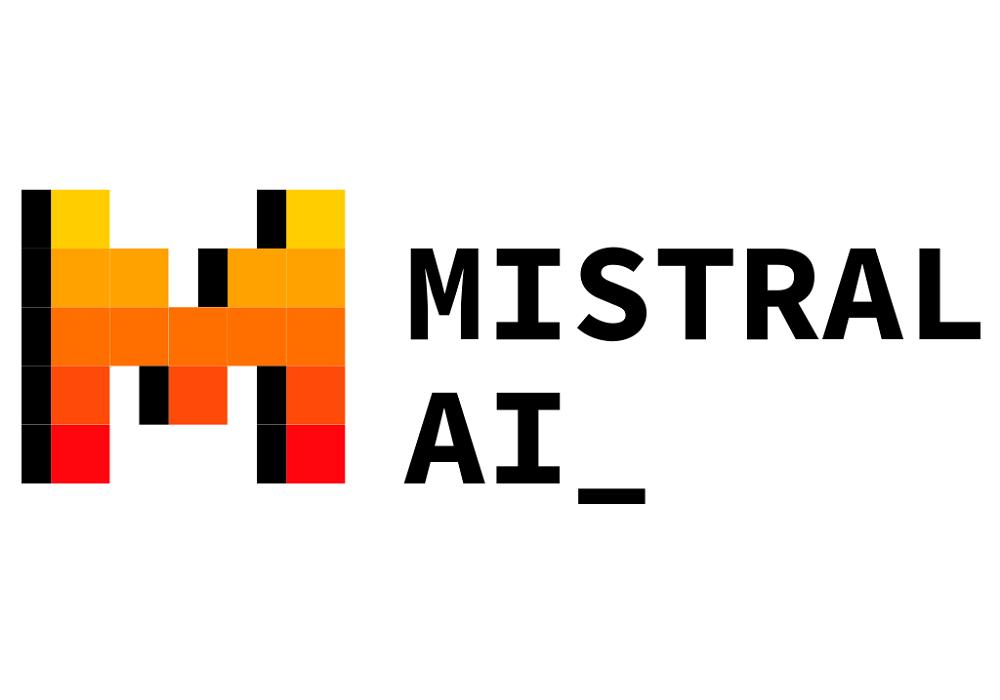

In [2]:
pip install windrose  # install windrose for plotting forces and directions. Further information at https://pypi.org/project/windrose/

In [5]:
# Step 1: import the required libraties
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
import numpy as np


In [9]:
# Step 2 load and convert into dataframes the load multipliers
# Source files will be available at the same github folder
df_load_0deg = pd.read_csv('WWC_0_DEG.csv')  # Data for a DLC with Wind Wave and Current at 0 degrees
df_load_30deg = pd.read_csv('WWC_30_DEG.csv') # Data for a DLC with Wind Wave and Current at 30 degrees
df_load_60deg = pd.read_csv('WWC_60_DEG.csv') # Data for a DLC with Wind Wave and Current at 60 degrees



In [29]:
# Step 3: check the dataframes
# Dataframe for DLC WWC at 0 degrees
df_load_0deg.head()


,Step,Multiplier_0_deg,Multiplier_120_deg,Multiplier_240_deg,Multiplier_Res,Alpha_Res
0,0,0.815655,0.362632,0.335726,0.467057,2.859612
1,1,0.808022,0.353673,0.328902,0.467227,2.631569
2,2,0.807240,0.360301,0.327727,0.464084,3.484957
3,3,0.806085,0.365864,0.328250,0.460182,4.059156
4,4,0.800285,0.359054,0.327050,0.458073,3.468907


# DataFrame Column Explanation

This dataframe contains multipliers for different directions and their resultant values. Here is a detailed explanation of each column:

- **Multiplier_0_deg**: Represents the multiplier at 0 degrees direction.
- **Multiplier_120_deg**: Represents the multiplier at 120 degrees direction.
- **Multiplier_240_deg**: Represents the multiplier at 240 degrees direction.
- **Multiplier_Res**: This is the resultant multiplier, equivalent to the sum of forces from the different directions. It is akin to a resultant force.
- **Alpha_Res**: This is the angle of the resultant force multiplier, indicating the direction of the resultant force.

## DataFrame Example

| Step | Multiplier_0_deg | Multiplier_120_deg | Multiplier_240_deg | Multiplier_Res | Alpha_Res |
|------|------------------|--------------------|--------------------|----------------|-----------|
| 0    | 0.815655         | 0.362632           | 0.335726           | 0.467057       | 2.859612  |
| 1    | 0.808022         | 0.353673           | 0.328902           | 0.467227       | 2.631569  |
| 2    | 0.807240         | 0.360301           | 0.327727           | 0.464084       | 3.484957  |
| 3    | 0.806085         | 0.365864           | 0.328250           | 0.460182       | 4.059156  |
| 4    | 0.800285         | 0.359054           | 0.327050           | 0.458073       | 3.468907  |

This dataframe provides a comprehensive view of the multipliers and their resultant values, which can be used for further analysis and applications in studying multidirectional loads for anchors in floating wind turbines.


In [12]:
# Dataframe for DLC WWC at 30 degrees
df_load_30deg.head()

,Step,Multiplier_0_deg,Multiplier_120_deg,Multiplier_240_deg,Multiplier_Res,Alpha_Res
0,0,0.849945,0.602772,0.190340,0.577180,38.230733
1,1,0.812781,0.596541,0.181585,0.555589,40.301812
2,2,0.794900,0.592944,0.179162,0.543661,41.233883
3,3,0.794886,0.591257,0.184236,0.538528,40.885093
4,4,0.792379,0.590757,0.183406,0.537324,41.036714


In [13]:
# Dataframe for DLC WWC at 60 degrees
df_load_60deg.head()

,Step,Multiplier_0_deg,Multiplier_120_deg,Multiplier_240_deg,Multiplier_Res,Alpha_Res
0,0,0.299938,0.811746,0.343175,0.491617,124.368181
1,1,0.292728,0.799494,0.337418,0.485965,124.567981
2,2,0.290155,0.788268,0.334819,0.477351,124.647769
3,3,0.288427,0.783104,0.333002,0.473964,124.671781
4,4,0.287700,0.780517,0.331791,0.472317,124.637082


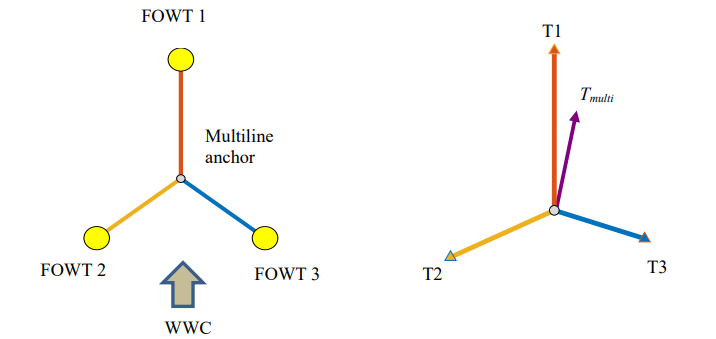

## T1 is represented by Multiplier_0deg
## T2 is represented by Multiplier_120deg
## T3 is represented by Multiplier_240deg
## Multiplier_Res is represented by Tres. the resultant force

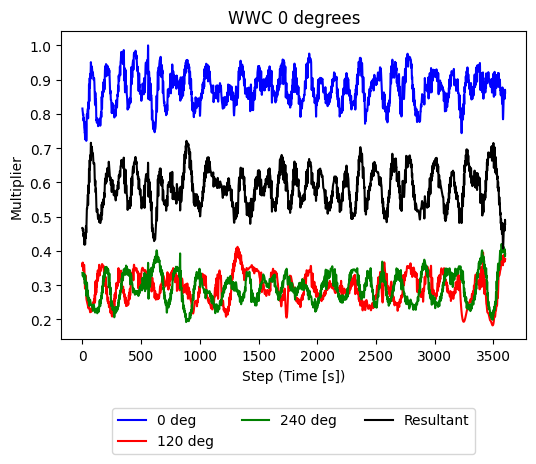

In [24]:
# Step 4: Plot the time histories of load
# DLC WWC 0 degrees
plt.figure(figsize=(6, 4))
plt.plot(df_load_0deg['Step'],df_load_0deg['Multiplier_0_deg'], color='blue', label='0 deg')
plt.plot(df_load_0deg['Step'],df_load_0deg['Multiplier_120_deg'], color='red', label='120 deg')
plt.plot(df_load_0deg['Step'],df_load_0deg['Multiplier_240_deg'], color='green', label='240 deg')
plt.plot(df_load_0deg['Step'],df_load_0deg['Multiplier_Res'], color='black', label='Resultant')
# Adding title and labels
plt.title('WWC 0 degrees')
plt.xlabel('Step (Time [s])')
plt.ylabel('Multiplier')

# Adding legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Display the plot
plt.show()

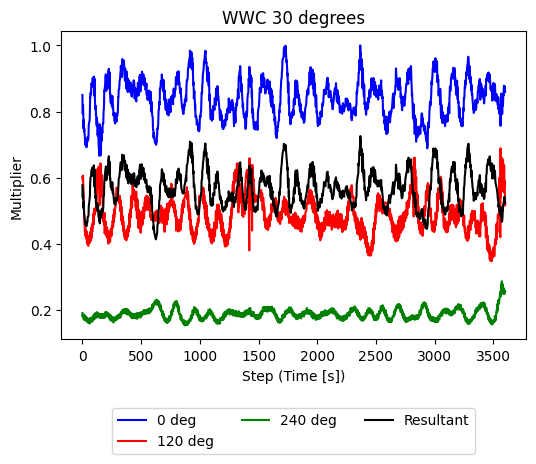

In [25]:
# DLC WWC 30 degrees
plt.figure(figsize=(6, 4))
plt.plot(df_load_30deg['Step'],df_load_30deg['Multiplier_0_deg'], color='blue', label='0 deg')
plt.plot(df_load_30deg['Step'],df_load_30deg['Multiplier_120_deg'], color='red', label='120 deg')
plt.plot(df_load_30deg['Step'],df_load_30deg['Multiplier_240_deg'], color='green', label='240 deg')
plt.plot(df_load_30deg['Step'],df_load_30deg['Multiplier_Res'], color='black', label='Resultant')
# Adding title and labels
plt.title('WWC 30 degrees')
plt.xlabel('Step (Time [s])')
plt.ylabel('Multiplier')

# Adding legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Display the plot
plt.show()

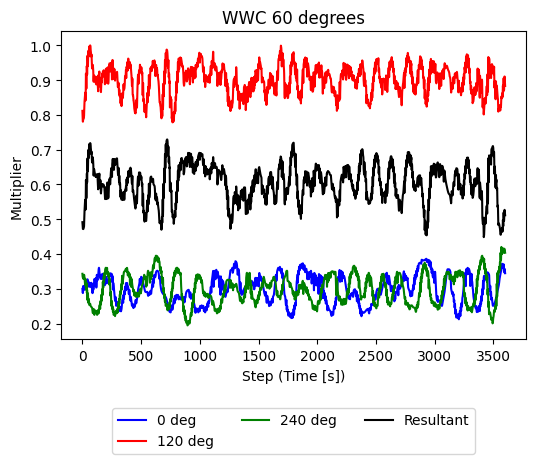

In [26]:
# DLC WWC 60 degrees
plt.figure(figsize=(6, 4))
plt.plot(df_load_60deg['Step'],df_load_60deg['Multiplier_0_deg'], color='blue', label='0 deg')
plt.plot(df_load_60deg['Step'],df_load_60deg['Multiplier_120_deg'], color='red', label='120 deg')
plt.plot(df_load_60deg['Step'],df_load_60deg['Multiplier_240_deg'], color='green', label='240 deg')
plt.plot(df_load_60deg['Step'],df_load_60deg['Multiplier_Res'], color='black', label='Resultant')
# Adding title and labels
plt.title('WWC 60 degrees')
plt.xlabel('Step (Time [s])')
plt.ylabel('Multiplier')

# Adding legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Display the plot
plt.show()

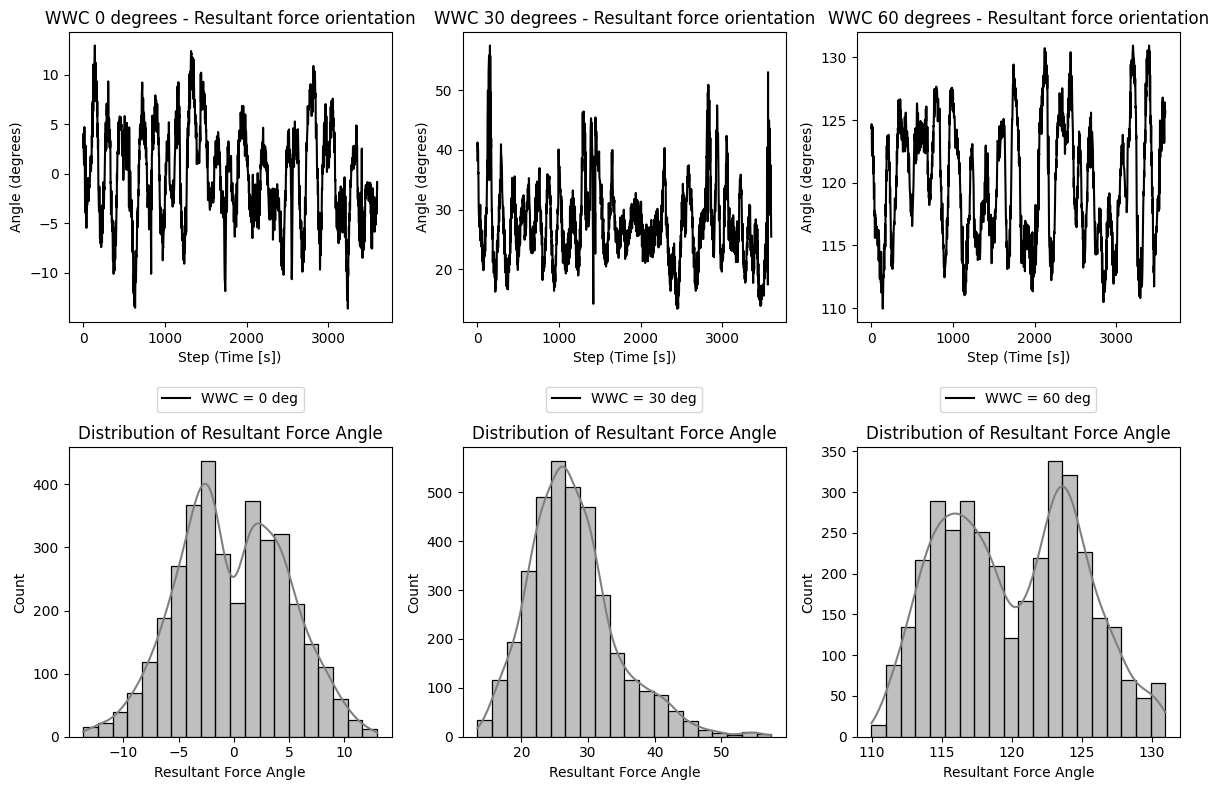

In [41]:
# Now let's focus on the resultant forces angle
# Step 5: plot the resultant force orientation/angle and observe its distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Row 1, Column 1
axs[0, 0].plot(df_load_0deg['Step'], df_load_0deg['Alpha_Res'], color='black', label='WWC = 0 deg')
axs[0, 0].set_title('WWC 0 degrees - Resultant force orientation')
axs[0, 0].set_xlabel('Step (Time [s])')
axs[0, 0].set_ylabel('Angle (degrees)')
axs[0, 0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Row 1, Column 2
axs[0, 1].plot(df_load_30deg['Step'], df_load_30deg['Alpha_Res'], color='black', label='WWC = 30 deg')
axs[0, 1].set_title('WWC 30 degrees - Resultant force orientation')
axs[0, 1].set_xlabel('Step (Time [s])')
axs[0, 1].set_ylabel('Angle (degrees)')
axs[0, 1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Row 1, Column 3
axs[0, 2].plot(df_load_60deg['Step'], df_load_60deg['Alpha_Res'], color='black', label='WWC = 60 deg')
axs[0, 2].set_title('WWC 60 degrees - Resultant force orientation')
axs[0, 2].set_xlabel('Step (Time [s])')
axs[0, 2].set_ylabel('Angle (degrees)')
axs[0, 2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Row 2, Column 1
sns.histplot(df_load_0deg['Alpha_Res'], bins=20, kde=True, color='grey', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Resultant Force Angle')
axs[1, 0].set_xlabel('Resultant Force Angle')

# Row 2, Column 2
sns.histplot(df_load_30deg['Alpha_Res'], bins=20, kde=True, color='grey', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Resultant Force Angle')
axs[1, 1].set_xlabel('Resultant Force Angle')

# Row 2, Column 3
sns.histplot(df_load_60deg['Alpha_Res'], bins=20, kde=True, color='grey', ax=axs[1, 2])
axs[1, 2].set_title('Distribution of Resultant Force Angle')
axs[1, 2].set_xlabel('Resultant Force Angle')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


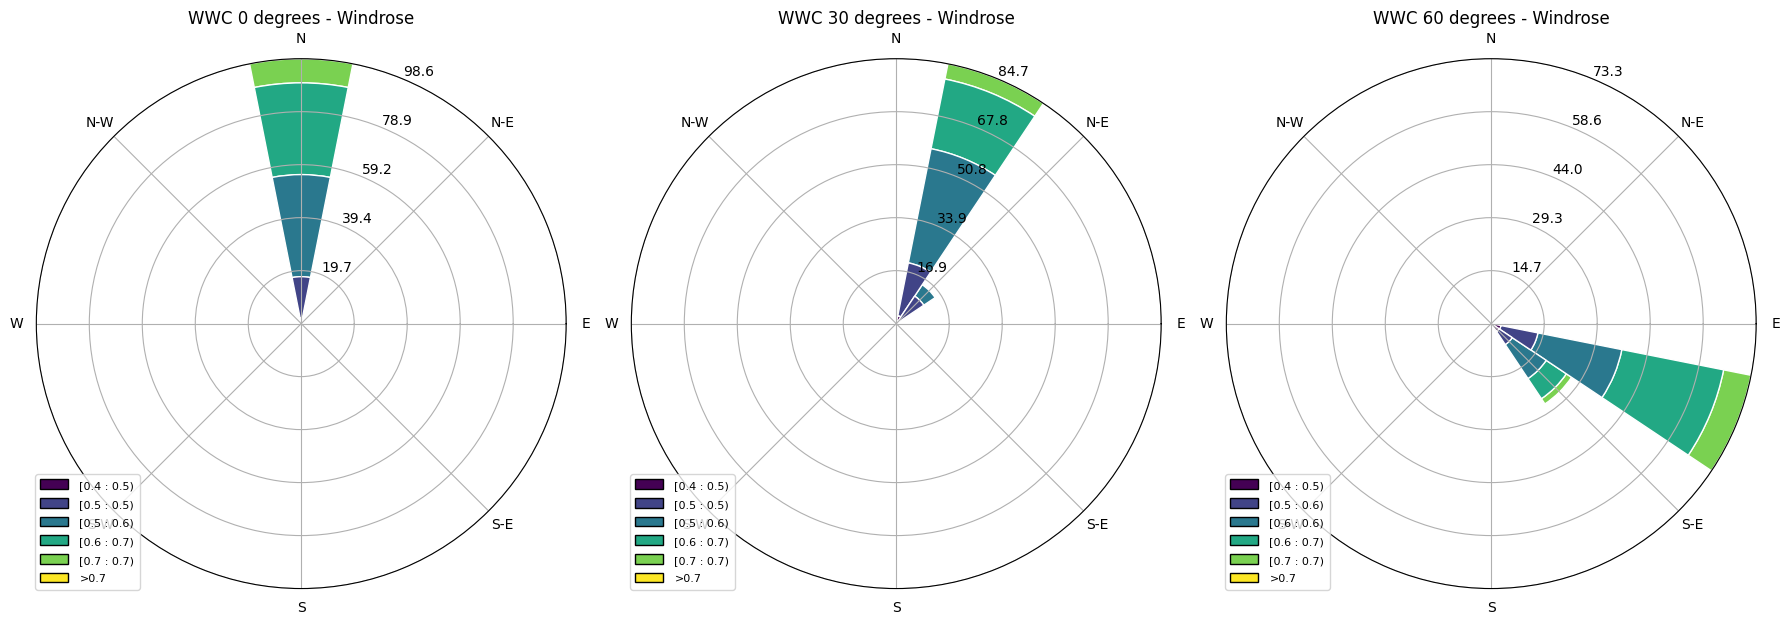

In [45]:
# Step 6: Create windrose plots
# We can further visualize the resultant force orientation using windrose plots
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Create a figure and a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection='windrose'))

# Subplot 1: WWC 0 degrees
axs[0].bar(df_load_0deg['Alpha_Res'], df_load_0deg['Multiplier_Res'], normed=True, opening=1, edgecolor="white")
axs[0].set_legend()
axs[0].set_title('WWC 0 degrees - Windrose')

# Subplot 2: WWC 30 degrees
axs[1].bar(df_load_30deg['Alpha_Res'], df_load_30deg['Multiplier_Res'], normed=True, opening=1, edgecolor="white")
axs[1].set_legend()
axs[1].set_title('WWC 30 degrees - Windrose')

# Subplot 3: WWC 60 degrees
axs[2].bar(df_load_60deg['Alpha_Res'], df_load_60deg['Multiplier_Res'], normed=True, opening=1, edgecolor="white")
axs[2].set_legend()
axs[2].set_title('WWC 60 degrees - Windrose')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

# Notice that the 120 degrees orientation angle for a windrose plot goes to the SE direction. here the angle is rendered sollowing a clockwise direction

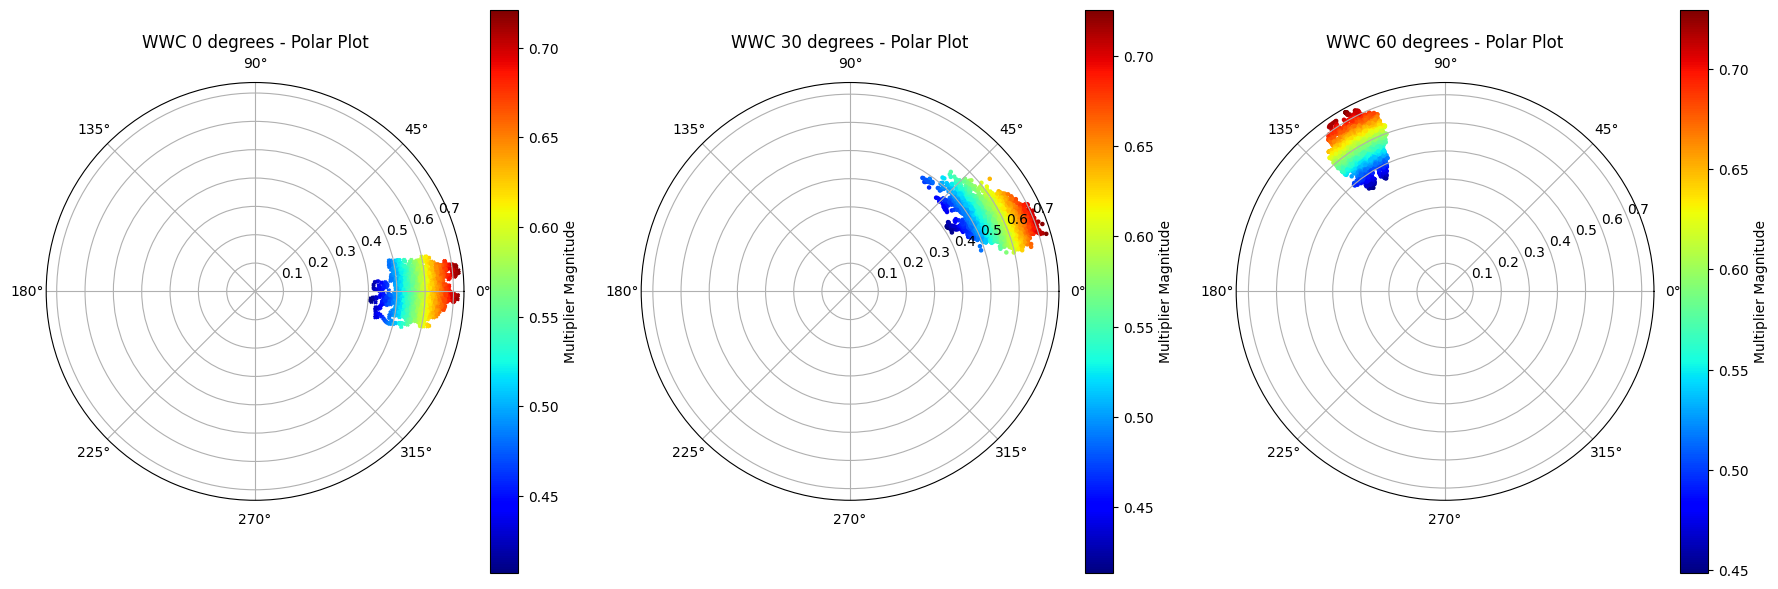

In [58]:
# Step 7: create polar plots
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection='polar'))

# Subplot 1: WWC 0 degrees
r0=df_load_0deg['Multiplier_Res']
theta0 = np.radians(df_load_0deg['Alpha_Res'])
scatter0 = axs[0].scatter(theta0, r0, s=5, c=r0, cmap='jet', alpha=1, marker ='x')
axs[0].set_title('WWC 0 degrees - Polar Plot', fontsize=12)
fig.colorbar(scatter0, ax=axs[0], label="Multiplier Magnitude")

# Subplot 2: WWC 30 degrees
r30=df_load_30deg['Multiplier_Res']
theta30 = np.radians(df_load_30deg['Alpha_Res'])
scatter30 = axs[1].scatter(theta30, r30, s=5, c=r30, cmap='jet', alpha=1)
axs[1].set_title('WWC 30 degrees - Polar Plot', fontsize=12)
fig.colorbar(scatter30, ax=axs[1], label="Multiplier Magnitude")

# Subplot 3: WWC 60 degrees
r60=df_load_60deg['Multiplier_Res']
theta60 = np.radians(df_load_60deg['Alpha_Res'])
scatter60 = axs[2].scatter(theta60, r60, s=5, c=r60, cmap='jet', alpha=1)
axs[2].set_title('WWC 60 degrees - Polar Plot', fontsize=12)
fig.colorbar(scatter60, ax=axs[2], label="Multiplier Magnitude")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

# Notice that the 120 degrees angle was rendered counterclockwise, I think this representation is better for our application